# Проект HR аналитика

### Описание проекта

HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. В этом HR-аналитикам пригодится машинное обучение, с помощью которого получится быстрее и точнее отвечать на вопросы бизнеса.


Компания предоставила данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён. 


Собирать данные такими опросниками не так легко: компания большая, и всех сотрудников надо сначала оповестить об опросе, а затем проследить, что все его прошли. 


У нас будет несколько задач. Первая — построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. 


Почему бизнесу это важно: удовлетворённость работой напрямую влияет на отток сотрудников. А предсказание оттока — одна из важнейших задач HR-аналитиков. Внезапные увольнения несут в себе риски для компании, особенно если уходит важный сотрудник.


Наша вторая задача — построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

### Ход исследования

Заказчик предоставил данные с признаками:
- id — уникальный идентификатор сотрудника;
- dept — отдел, в котором работает сотрудник;
- level — уровень занимаемой должности;
- workload — уровень загруженности сотрудника;
- employment_years — длительность работы в компании (в годах);
- last_year_promo — показывает, было ли повышение за последний год;
- last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;
- supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;
- salary — ежемесячная зарплата сотрудника;
- job_satisfaction_rate — уровень удовлетворённости сотрудника работой в компании, целевой признак.

### Задача 1: предсказание уровня удовлетворённости сотрудника

- Загрузка Данных
- Предобработка данных
- Исследовательский анализ данных
- Подготовка данных
- Обучение моделей
- Выводы

### Задача 2: предсказание увольнения сотрудника из компании

- Загрузка данных
- Предобработка данных
- Исследовательский анализ данных
- Добавление нового входного признака
- Подготовка данных
- Обучение модели
- Выводы

# Задача 1: предсказание уровня удовлетворённости сотрудника

## Загрузка данных

In [104]:
!pip install -q phik
!pip install -q shap
!pip install -U scikit-learn -q
import sklearn
import random
import phik
from scipy.stats import binom
from math import factorial
from math import sqrt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif 
from matplotlib import pyplot as plt
from scipy import stats as st
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score, r2_score, 
    confusion_matrix, 
    mean_absolute_error, 
    mean_squared_error, 
    precision_score, recall_score,
    roc_auc_score,
    f1_score,
    make_scorer
)
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    GridSearchCV,
    RandomizedSearchCV
)
from sklearn.preprocessing import (
    OneHotEncoder,
    PolynomialFeatures,
    OrdinalEncoder, 
    StandardScaler, 
    MinMaxScaler,
    RobustScaler,
    LabelEncoder,
)
from sklearn.feature_selection import SelectFromModel
from scipy.stats import shapiro
from sklearn.dummy import DummyClassifier
import shap
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline    
import shap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (RandomForestRegressor,
                              GradientBoostingRegressor, 
                              RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
RANDOM_STATE = 42

In [105]:
train_data = pd.read_csv('/datasets/train_job_satisfaction_rate.csv')
test_data = pd.read_csv('/datasets/test_features.csv')
target_data = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')

In [106]:
def get_info(data):
   
    print("Общая информация о датасете:")
    display(data.info())

    print("Описание числовых признаков:")
    display(data.describe())

    print("Количество пропущенных значений по столбцам:", data.isna().sum())
    
    print("Процентное соотношение пропущенных значений по столбцам:", (data.isna().sum() / len(data)) * 100)
 

    print("Количество дубликатов в датасете:", data.duplicated().sum()) 
    
    display("Первые 5 строк:", data.head())

In [107]:
get_info(train_data)

Общая информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


None

Описание числовых признаков:


,id,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,544957.621000,3.718500,3.476500,33926.700000,0.533995
std,257883.104622,2.542513,1.008812,14900.703838,0.225327
min,100954.000000,1.000000,1.000000,12000.000000,0.030000
25%,322836.750000,2.000000,3.000000,22800.000000,0.360000
50%,534082.500000,3.000000,4.000000,30000.000000,0.560000
75%,771446.000000,6.000000,4.000000,43200.000000,0.710000
max,999521.000000,10.000000,5.000000,98400.000000,1.000000


Количество пропущенных значений по столбцам: id                       0
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64
Процентное соотношение пропущенных значений по столбцам: id                       0.00
dept                     0.15
level                    0.10
workload                 0.00
employment_years         0.00
last_year_promo          0.00
last_year_violations     0.00
supervisor_evaluation    0.00
salary                   0.00
job_satisfaction_rate    0.00
dtype: float64
Количество дубликатов в датасете: 0


'Первые 5 строк:'

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


### Взгляд на  числовые признаки train_data
Длительность работы (employment_years):
- Средний срок работы сотрудника в компании составляет около 3.7 лет.

- Медианное значение — 3 года, что указывает на то, что половина сотрудников работает в компании менее 3 лет.

- Минимальный срок работы — 1 год, максимальный — 10 лет. Это говорит о наличии как новых сотрудников, так и тех, кто работает в компании уже долгое время.

- 25% сотрудников работают менее 2 лет, а 75% — менее 6 лет, что свидетельствует о значительном разбросе в продолжительности работы.

- Стандартное отклонение — 2.54.


Оценка руководителя (supervisor_evaluation):
- Средняя оценка работы сотрудников — 3.48 балла.

- Медианное значение — 4 балла, что указывает на то, что большинство сотрудников получают оценки в диапазоне 3-4 балла.

- Минимальная оценка — 1 балл, максимальная — 5 баллов. 

- Стандартное отклонение — 1.01, что свидетельствует о наличии как низких, так и высоких оценок.


Зарплата (salary):
- Средняя зарплата сотрудников составляет 33,926 рублей.

- Медианное значение — 30,000 рублей, что означает, что половина сотрудников получает меньше этой суммы.

- Минимальная зарплата — 12,000 рублей, максимальная — 98,400 рублей. 

- 25% сотрудников получают менее 22,800 рублей, а 75% — менее 43,200 рублей.

- Стандартное отклонение — 14,900, что указывает на значительный разброс в зарплатах, вероятно, из-за различий в должностях, отделах или уровне опыта.

Удовлетворённость работой (job_satisfaction_rate):
- Средний уровень удовлетворённости сотрудников — 0.53, что указывает на умеренную удовлетворённость работой.

- Медианное значение — 0.56, то есть у половины сотрудников уровень удовлетворённости превышает 56%.

- 25% сотрудников имеют уровень удовлетворённости менее 0.36, а 75% — менее 0.71.

- Минимальное значение — 0.03, максимальное — 1. Это говорит о том, что в компании есть как полностью неудовлетворённые, так и полностью удовлетворённые сотрудники.


- Стандартное отклонение — 0.23, что говорит о значительном разбросе в уровне удовлетворённости.


Общие выводы:
В компании наблюдается разнообразие в сроках работы сотрудников: от новичков до тех, кто работает более 10 лет. Зарплаты и оценки руководителей также имеют широкий диапазон, что может быть связано с различиями в должностях, отделах или уровне квалификации. Уровень удовлетворённости работой варьируется, что указывает на влияние множества факторов, включая зарплату, условия труда и личные предпочтения сотрудников.

Пристутствуют пропуски в двух столбцах в количестве 10 суммарно, множество явных дубликатов.

In [108]:
get_info(test_data)

Общая информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


None

Описание числовых признаков:


,id,employment_years,supervisor_evaluation,salary
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,552765.213500,3.666500,3.526500,34066.800000
std,253851.326129,2.537222,0.996892,15398.436729
min,100298.000000,1.000000,1.000000,12000.000000
25%,339052.000000,1.000000,3.000000,22800.000000
50%,550793.000000,3.000000,4.000000,30000.000000
75%,765763.750000,6.000000,4.000000,43200.000000
max,999029.000000,10.000000,5.000000,96000.000000


Количество пропущенных значений по столбцам: id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64
Процентное соотношение пропущенных значений по столбцам: id                       0.00
dept                     0.10
level                    0.05
workload                 0.00
employment_years         0.00
last_year_promo          0.00
last_year_violations     0.00
supervisor_evaluation    0.00
salary                   0.00
dtype: float64
Количество дубликатов в датасете: 0


'Первые 5 строк:'

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


В тестой выборке обнаружены 3 пропуска.

## Предобработка данных

In [109]:
# функция для перевода колонок в нижние регистры и замена пробелов на нижние пробелы

def normalize_col(col_names):
    return [col.lower().replace(' ', '_') for col in col_names]

In [110]:
train_data.columns = normalize_col(train_data.columns)
train_data.columns

Index(['id', 'dept', 'level', 'workload', 'employment_years',
       'last_year_promo', 'last_year_violations', 'supervisor_evaluation',
       'salary', 'job_satisfaction_rate'],
      dtype='object')

In [111]:
test_data.columns = normalize_col(test_data.columns)
test_data.columns

Index(['id', 'dept', 'level', 'workload', 'employment_years',
       'last_year_promo', 'last_year_violations', 'supervisor_evaluation',
       'salary'],
      dtype='object')

In [112]:
target_data.columns = normalize_col(target_data.columns)
target_data.columns

Index(['id', 'job_satisfaction_rate'], dtype='object')

In [113]:
# Необходимо удалить колонку "id", или перевести в индекс т.к. между ним и целевым признаком нет связи
train_data = train_data.set_index('id')


print("Количество дубликатов в датасете train_data:", train_data.duplicated().sum()) 


Количество дубликатов в датасете train_data: 245


In [114]:
# можно объединить датасеты для тестовой выборки
test_data = test_data.merge(target_data, on='id').sort_values(by='id').reset_index(drop=True)

display(test_data.head())

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,100298,hr,junior,low,2,no,no,4,19200,0.80
1,100480,marketing,junior,low,4,no,no,4,16800,0.84
2,100503,purchasing,middle,high,5,no,no,4,55200,0.79
3,100610,sales,middle,medium,5,no,no,4,43200,0.75
4,100692,sales,middle,high,6,no,no,4,48000,0.69


In [115]:
# Посмотрим на дубликаты 
test_data = test_data.set_index('id')

print("Количество дубликатов в датасете test_data:", test_data.duplicated().sum())

Количество дубликатов в датасете test_data: 83


In [116]:
# Удаление дубликатов
train_data = train_data.drop_duplicates()
print("Количество дубликатов в датасете:", train_data.duplicated().sum()) 

Количество дубликатов в датасете: 0


Для test_data удалять дубликаты нельзя, удалены дубликаты для train_data

In [117]:
# Создание функции для выявления уникальных значений
def get_unique_values(data):
    return {col: data[col].unique() for col in data.columns if data[col].dtype == 'object'}

print("Уникальные значения train_data:", get_unique_values(train_data))
print()
print("Уникальные значения test_data:", get_unique_values(test_data))

Уникальные значения train_data: {'dept': array(['sales', 'hr', 'technology', 'purchasing', 'marketing', nan],
      dtype=object), 'level': array(['junior', 'middle', 'sinior', nan], dtype=object), 'workload': array(['medium', 'high', 'low'], dtype=object), 'last_year_promo': array(['no', 'yes'], dtype=object), 'last_year_violations': array(['no', 'yes'], dtype=object)}

Уникальные значения test_data: {'dept': array(['hr', 'marketing', 'purchasing', 'sales', 'technology', nan, ' '],
      dtype=object), 'level': array(['junior', 'middle', 'sinior', nan], dtype=object), 'workload': array(['low', 'high', 'medium', ' '], dtype=object), 'last_year_promo': array(['no', 'yes'], dtype=object), 'last_year_violations': array(['no', 'yes'], dtype=object)}


Неявных дубликатов не обнаружено, есть опечатка.

In [118]:
# Исправление опечатки
train_data['level'] = train_data['level'].replace('sinior', 'senior')


### Вывод
- Обнаружены 10 прпусков
- Столбцы приведены к единому виду
- удалены 245 явных дубликатов для train_data и остались 83 для test_data
- неявных дубликатов не обнаружено
- исправлена опечатка 'sinior' на 'senior'

## Исследовательский анализ данных

In [119]:
# Разделение датасета на количественные и категориальные признаки
quantitative_features = ['salary', 'job_satisfaction_rate']
categorical_features = ['employment_years', 'supervisor_evaluation', 'dept', 'level', 'workload', 'last_year_promo', 'last_year_violations']

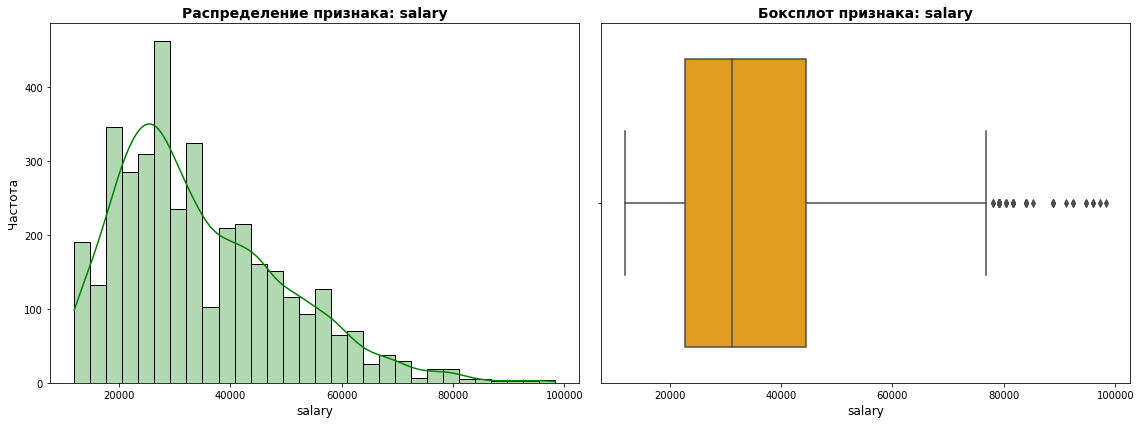

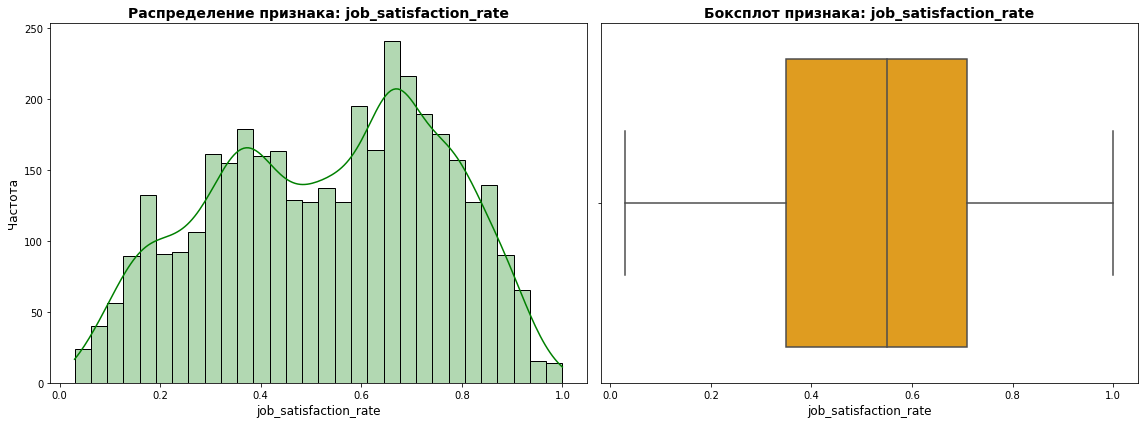

In [120]:
# Распределения для количественных признаков train_data
for feature in quantitative_features:
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(train_data[feature], color='green',  alpha=0.3, bins=30, kde=True)
    plt.title(f'Распределение признака: {feature}', fontsize=14, weight='bold')
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Частота', fontsize=12)
        
    plt.subplot(1, 2, 2)
    sns.boxplot(x=train_data[feature], color='orange')
    plt.title(f'Боксплот признака: {feature}', fontsize=14, weight='bold')
    plt.xlabel(feature, fontsize=12)
    
    plt.tight_layout()
    plt.show()

В колонке с зарплатой видно большое количество выбросов.

In [121]:
display(train_data[train_data['salary'] > 74000])

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
538347,technology,senior,high,3,no,no,1,84000,0.21
128304,marketing,senior,high,7,no,no,3,80400,0.48
486576,marketing,senior,high,9,no,no,4,76800,0.66
405345,marketing,senior,high,7,no,no,2,81600,0.58
399126,sales,senior,high,2,no,no,2,76800,0.26
590999,purchasing,senior,high,10,no,yes,4,74400,0.74
301946,hr,senior,high,7,no,no,5,75600,0.75
493024,technology,senior,high,10,no,no,4,79200,0.64
148024,technology,senior,high,4,no,no,4,94800,0.67


Все помидоры. Сеньоры то есть. Их много, данные старые (наверное), зарплаты ммм нормальные.

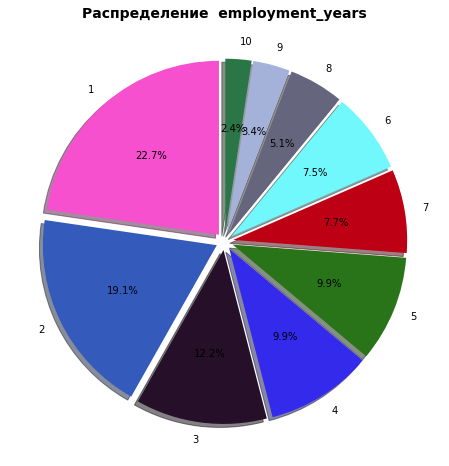

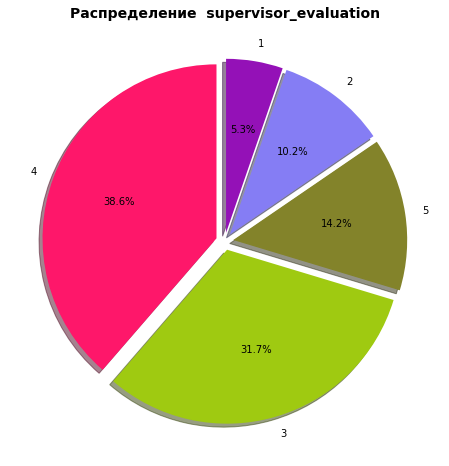

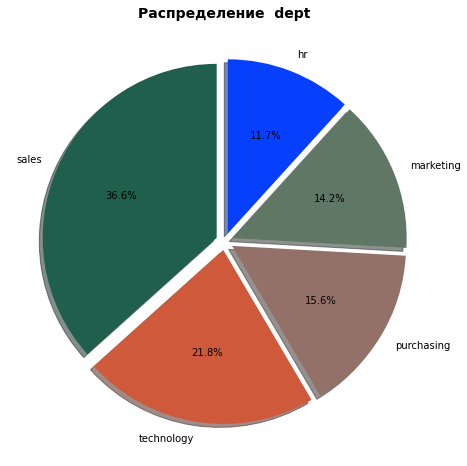

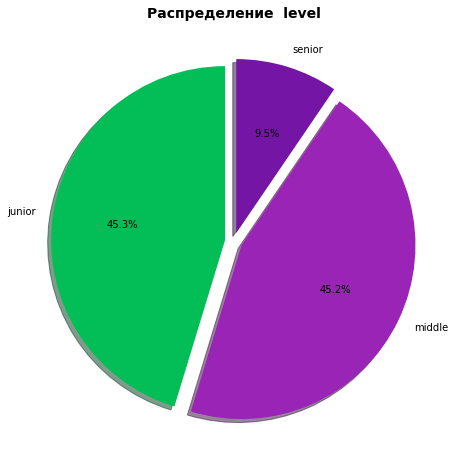

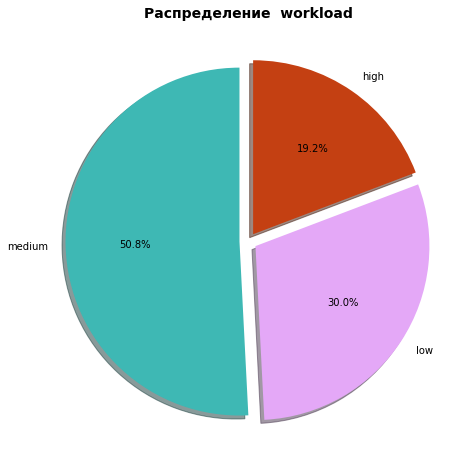

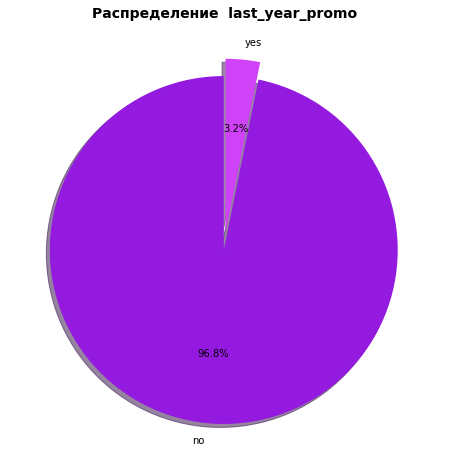

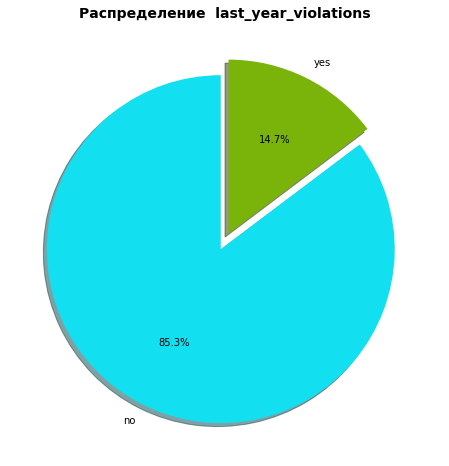

In [122]:
# Распределения категориальных признаков
   
for column in categorical_features:
    
    value_counts = train_data[column].value_counts()
    
    colors = ['#' + ''.join(random.choices('0123456789ABCDEF', k=6)) for _ in range(len(value_counts))]
    
    # Круговая диаграмма
    plt.figure(figsize=(8, 8))
    value_counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, explode=[0.05] * len(value_counts), startangle=90, shadow=True)
    plt.title(f'Распределение  {column}', fontsize=14, weight='bold')
    plt.ylabel('')  # Убираем подпись оси Y
    plt.show()    

### Взгляд на категориальные признаки train_data

- Стаж работы (employment_years):
Средний стаж работы сотрудников составляет около 3.7 лет, что указывает на относительно низкую текучесть кадров. Большинство сотрудников имеют опыт работы от 1 до 3 лет, а доля тех, кто работает более 10 лет, минимальна.


- Оценка руководителя (supervisor_evaluation):
Оценки сотрудников варьируются от 1 до 5, со средним значением около 3.5. Большинство сотрудников получают оценки 3 или 4, что свидетельствует о в целом удовлетворительном качестве работы.

- Отделы (dept):
Наибольшее количество сотрудников работает в технологическом отделе (technology) и в отделе продаж (sales). Отделы закупок (purchasing), маркетинга и HR имеют меньшую численность, что отражает распределение ресурсов компании.


- Уровень сотрудников (level):
Большинство сотрудников занимают позиции junior (47.3%) и middle (43.7%), в то время как доля senior-сотрудников составляет всего 9%. Это свидетельствует о пирамидальной структуре организации, где меньше сотрудников на высших уровнях.

- Загруженность (workload):
Большая часть сотрудников (51.6%) имеет средний уровень загруженности. Низкая загруженность характерна для 30% сотрудников, а высокая — для 18.4%. Это указывает на сбалансированную нагрузку в компании.

- Повышения за последний год (last_year_promo):
Только 3% сотрудников получили повышение за последний год, что говорит о редких возможностях для карьерного роста в компании.

- Нарушения за последний год (last_year_violations):
14% сотрудников допустили нарушения за прошлый год. Это значительная доля, которая требует внимания при оценке качества работы и дисциплины.




Компания имеет пирамидальную структуру с преобладанием сотрудников на начальных и средних уровнях. Загруженность сотрудников в основном средняя, а возможности для повышения ограничены. Несмотря на редкие нарушения, качество работы сотрудников оценивается как удовлетворительное. Большинство сотрудников имеют небольшой опыт работы, а наибольшая численность сосредоточена в технологичесом отделе и в отделе продаж.

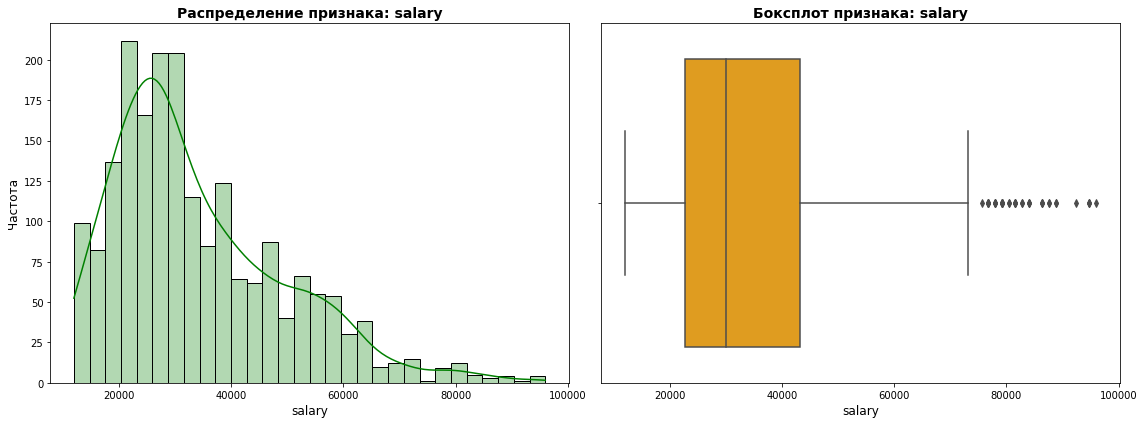

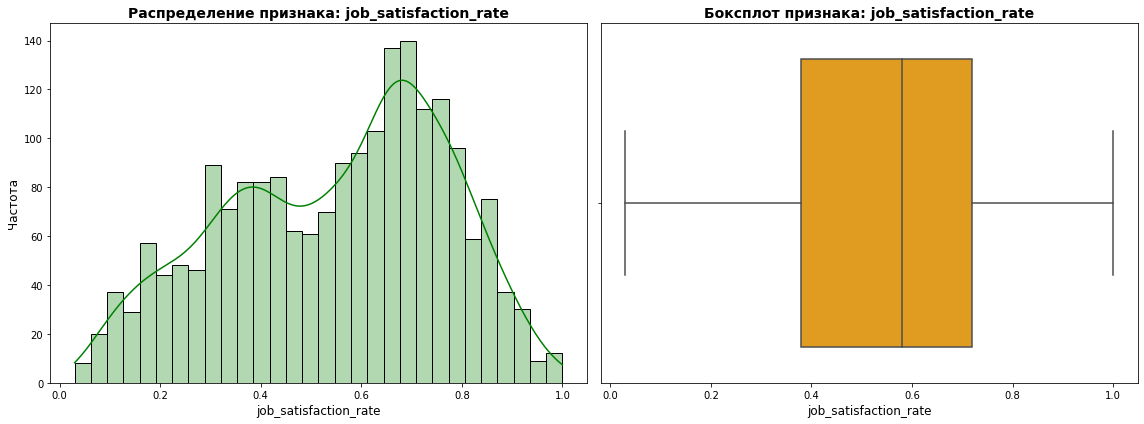

In [123]:
# Взгляд на распределения количественных признаков тестовой выборки

for feature in quantitative_features:
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(test_data[feature], color='green',  alpha=0.3, bins=30, kde=True)
    plt.title(f'Распределение признака: {feature}', fontsize=14, weight='bold')
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Частота', fontsize=12)
        
    plt.subplot(1, 2, 2)
    sns.boxplot(x=test_data[feature], color='orange')
    plt.title(f'Боксплот признака: {feature}', fontsize=14, weight='bold')
    plt.xlabel(feature, fontsize=12)
    
    plt.tight_layout()
    plt.show()

Распределения количественных признаков практически идентичны для тренировочной и тестовой выборок.

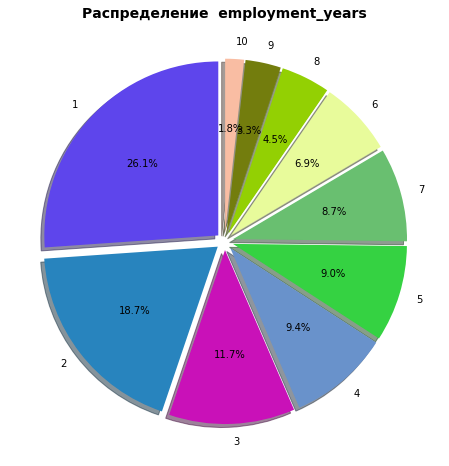

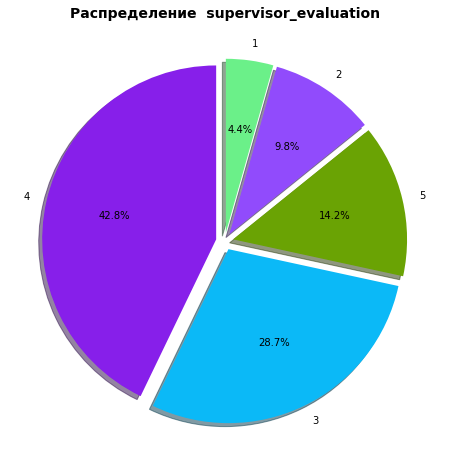

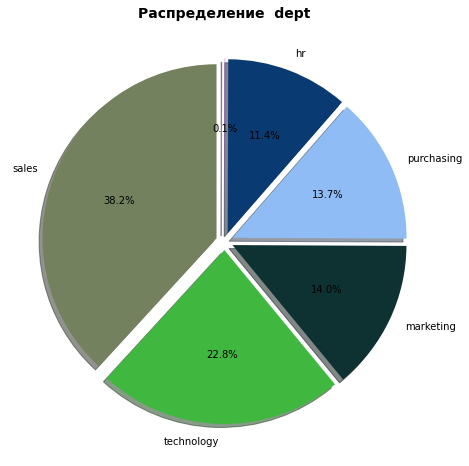

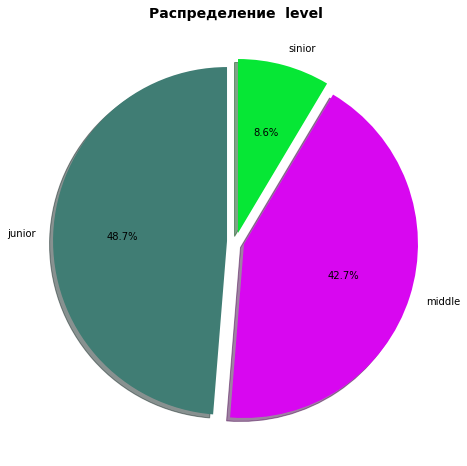

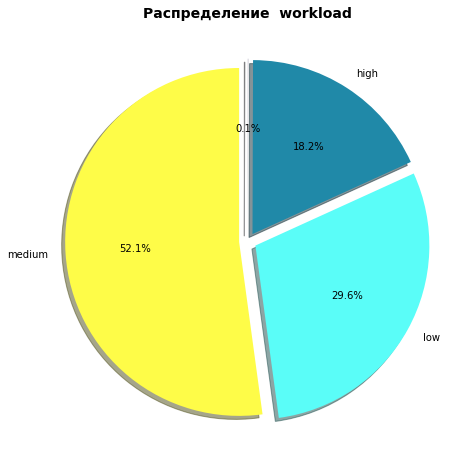

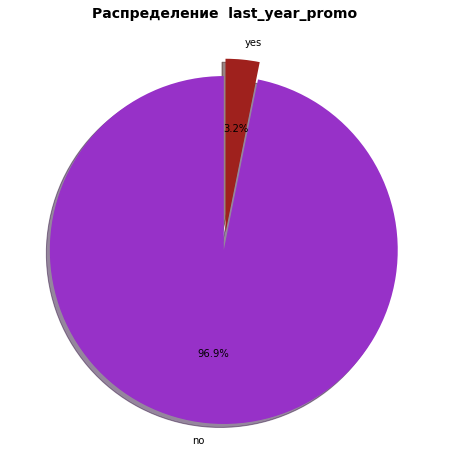

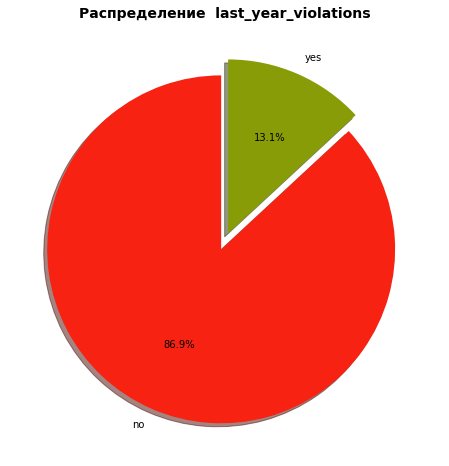

In [124]:
# Взгляд на распределения категориальных признаков тестовой выборки

for column in categorical_features:
    
    value_counts = test_data[column].value_counts()
    
    colors = ['#' + ''.join(random.choices('0123456789ABCDEF', k=6)) for _ in range(len(value_counts))]
    
    # Круговая диаграмма
    plt.figure(figsize=(8, 8))
    value_counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, explode=[0.05] * len(value_counts), startangle=90, shadow=True)
    plt.title(f'Распределение  {column}', fontsize=14, weight='bold')
    plt.ylabel('')  # Убираем подпись оси Y
    plt.show()

Распределения категориальных признаков так же очень похожи для тренировочной и тестовой выборок.

## Корреляционный анализ

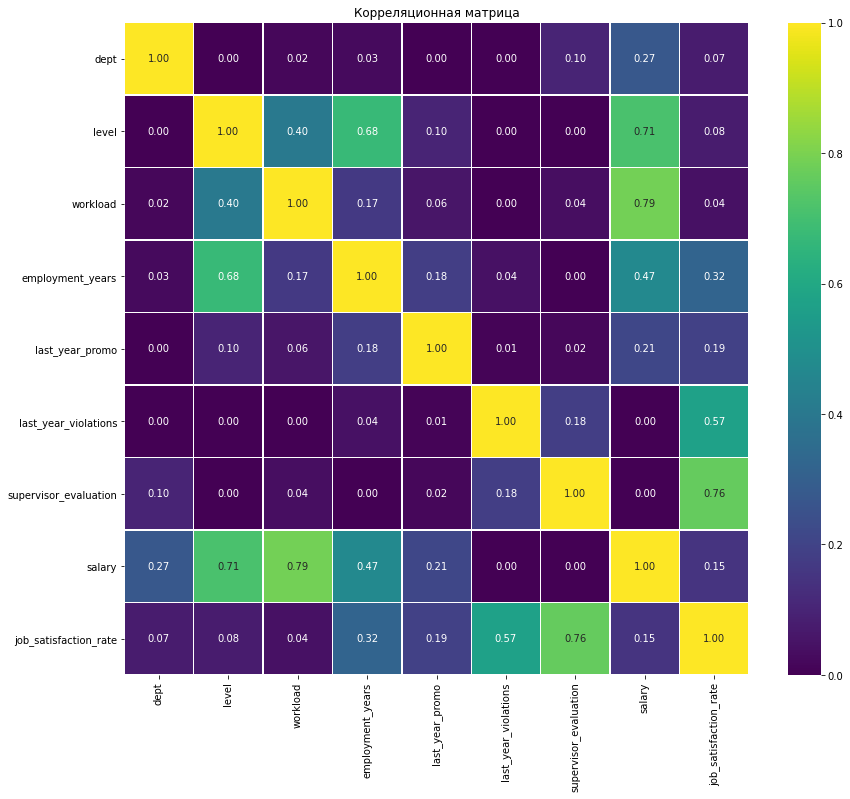

In [125]:
# Построение корелляцияонной матрицы train_data
correlation_matrix = train_data.phik_matrix(interval_cols=['salary', 'job_satisfaction_rate'])

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", cbar=True, linewidths=0.5)

plt.title('Корреляционная матрица')
plt.show()



Сильная корреляция ( > 0.7)

- salary и workload (0.79) - чем выше рабочая нагрузка, тем выше зарплата.
- salary и level (0.71) - чем выше уровень сотрудника, тем выше зарплата.
- supervisor_evaluation и job_satisfaction_rate (0.76) - более высокая оценка руководителя связана с более высоким уровнем удовлетворенности работой.

Умеренная корреляция (0.4 - 0.7)

- employment_years и level (0.68) - чем больше лет работы, тем выше уровень сотрудника.
- employment_years и salary (0.47) - больше стаж - выше зарплата.
- last_year_violations и job_satisfaction_rate (0.57) - неожиданный тренд: сотрудники с нарушениями в прошлом году могут быть более удовлетворены.

Слабая корреляция (< 0.4)

- dept и другие переменные имеют низкую корреляцию, что говорит о слабом влиянии отдела на зарплату, уровень и удовлетворенность.
- last_year_promo и остальные параметры имеют слабую связь, что может говорить о том, что повышение в прошлом году не сильно влияет на другие характеристики.

Почти нулевая корреляция (~0)

- last_year_violations с employment_years, workload, salary  означает, что нарушения в прошлом году практически не связаны с этими факторами.
- dept с last_year_promo - отдел не влияет на вероятность повышения.


Основные драйверы зарплаты — рабочая нагрузка, уровень сотрудника и стаж.
Оценка руководителя и удовлетворенность работой сильно взаимосвязаны.
Количество нарушений в прошлом году неожиданно связано с удовлетворенностью работой.
Остальные переменные не имеют сильных взаимосвязей.

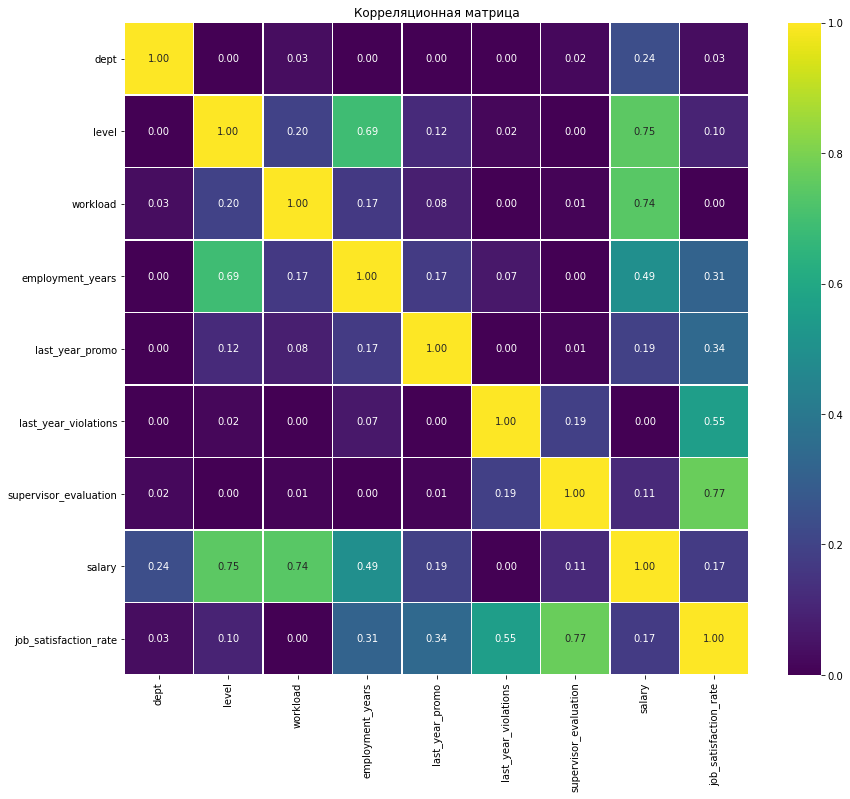

In [126]:
# Построение корелляцияонной матрицы test_data
correlation_matrix = test_data.phik_matrix(interval_cols=['salary', 'job_satisfaction_rate'])

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", cbar=True, linewidths=0.5)

plt.title('Корреляционная матрица')
plt.show()

Есть небольшая разница в корелляции признаков между тренировочной и тестовой выборками.

## Подготовка данных и обучение моделей

In [127]:

train_data = train_data.sort_values(by='id').reset_index(drop=True)

X_train = train_data.drop(['job_satisfaction_rate'], axis=1)
y_train = train_data['job_satisfaction_rate']
X_test = test_data.drop(['job_satisfaction_rate'], axis=1)
y_test = test_data['job_satisfaction_rate'] 

# обозначение данных для преобразования

cols_ohe = ['dept']
cols_ordinal = ['level', 'workload', 'last_year_promo', 'last_year_violations']
cols_to_scale = ['salary', 'employment_years', 'supervisor_evaluation']


# Бинарные признаки
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output = False)
        )
    ]
)

# Порядковые признаки
ordered_pipeline = Pipeline(
    [
        ('simpleImputer_before_ord',
         SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ordered',  OrdinalEncoder(
            categories=[['sinior', 'middle', 'junior'],
                        ['medium', 'high', 'low'],
                        ['no', 'yes'],
                        ['no', 'yes']],
            handle_unknown='use_encoded_value', unknown_value=np.nan)),
        ('simpleImputer_after_ord',
         SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

# Пайплайн
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, cols_ohe),
        ('ordered', ordered_pipeline, cols_ordinal),
        ('num', StandardScaler(), cols_to_scale),
    ], 
    remainder =  'passthrough'
)
# Обучение моделей
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LinearRegression())
])

param_grid = [
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(4, 8),
        'models__min_samples_split': [2, 5],
        'models__min_samples_leaf': [1, 2],
        'models__max_features': range(2, 4),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },
    {
        'models': [GradientBoostingRegressor(random_state=RANDOM_STATE)],
        'models__n_estimators': [100, 200],
        'models__learning_rate': [ 0.05, 0.1],
        'models__max_depth': range(4, 8),
        'models__min_samples_split': [2, 5],
        'models__min_samples_leaf': [1, 2],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },
    
    
    
    {
        'models': [Lasso(random_state=RANDOM_STATE)],
        'models__alpha': [0.1, 1, 10, 100],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },
]

# Создание метрики SMAPE «симметричное среднее абсолютное процентное отклонение»
def smape(y_true, y_pred):
   
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    
    numerator = np.abs(y_true - y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    
    smape_value = np.mean(numerator / denominator) * 100
    return smape_value

# Подбор гиперпараметров        
random_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring=make_scorer(smape, greater_is_better=False),
    random_state=RANDOM_STATE,
    n_jobs=-1
)
random_search.fit(X_train, y_train)
print('RandomizedSearchCV - Лучшая модель и её параметры:\n\n', random_search.best_estimator_)        

RandomizedSearchCV - Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept']),
                                                 ('ordered',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
  

In [128]:
y_pred = random_search.best_estimator_.predict(X_test)
unknown_categories = set(X_test['dept'].unique()) - set(X_train['dept'].unique())
if unknown_categories:
    print(f"Найдены неизвестные категории: {unknown_categories}")

Найдены неизвестные категории: {' '}


/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Помним, что в тестовой выборке есть пустые значения в столбцах "Dept" и "Workload"

In [129]:
#Использование SMAPE
smape_test = smape(y_test, y_pred)
print(f"Лучшие параметры: {random_search.best_params_}")
print(f"SMAPE на тестовой выборке: {smape_test:.2f}%")

Лучшие параметры: {'preprocessor__num': MinMaxScaler(), 'models__n_estimators': 100, 'models__min_samples_split': 5, 'models__min_samples_leaf': 1, 'models__max_depth': 6, 'models__learning_rate': 0.1, 'models': GradientBoostingRegressor(random_state=42)}
SMAPE на тестовой выборке: 11.99%


Лучшей моделью является GradientBoostingRegressor с гиперпарамтерами max_depth=6, min_samples_split=5

In [130]:
# Проверка на адекватность
smape_dummy = smape(y_test, DummyRegressor(strategy="mean").fit(X_train, y_train).predict(X_test))

print(f'SMAPE для DummyRegressor: {smape_dummy}')

SMAPE для DummyRegressor: 38.26225790202237


Модель легко проходит проверку, показатель SMAPE значительно ниже, чем у Dummy модели.

In [131]:
pd.set_option('display.max_colwidth', None)
results_1 = pd.DataFrame(randomized_search.cv_results_)[['rank_test_score', 'param_models', 'mean_test_score','params']]\
            .sort_values('rank_test_score')
results_1

,rank_test_score,param_models,mean_test_score,params
3,1,GradientBoostingClassifier(random_state=42),0.907660,"{'preprocessor__num': 'passthrough', 'models__n_estimators': 100, 'models__min_samples_split': 2, 'models__min_samples_leaf': 8, 'models__max_depth': 4, 'models__learning_rate': 0.05, 'models': GradientBoostingClassifier(random_state=42)}"
2,2,GradientBoostingClassifier(random_state=42),0.901614,"{'preprocessor__num': RobustScaler(), 'models__n_estimators': 100, 'models__min_samples_split': 10, 'models__min_samples_leaf': 2, 'models__max_depth': 5, 'models__learning_rate': 0.05, 'models': GradientBoostingClassifier(random_state=42)}"
0,3,GradientBoostingClassifier(random_state=42),0.899899,"{'preprocessor__num': RobustScaler(), 'models__n_estimators': 100, 'models__min_samples_split': 2, 'models__min_samples_leaf': 2, 'models__max_depth': 4, 'models__learning_rate': 0.1, 'models': GradientBoostingClassifier(random_state=42)}"
7,4,GradientBoostingClassifier(random_state=42),0.896431,"{'preprocessor__num': RobustScaler(), 'models__n_estimators': 50, 'models__min_samples_split': 2, 'models__min_samples_leaf': 1, 'models__max_depth': 4, 'models__learning_rate': 0.001, 'models': GradientBoostingClassifier(random_state=42)}"
1,5,GradientBoostingClassifier(random_state=42),0.896317,"{'preprocessor__num': StandardScaler(), 'models__n_estimators': 500, 'models__min_samples_split': 20, 'models__min_samples_leaf': 1, 'models__max_depth': 5, 'models__learning_rate': 0.001, 'models': GradientBoostingClassifier(random_state=42)}"
9,6,GradientBoostingClassifier(random_state=42),0.892431,"{'preprocessor__num': RobustScaler(), 'models__n_estimators': 300, 'models__min_samples_split': 20, 'models__min_samples_leaf': 8, 'models__max_depth': 5, 'models__learning_rate': 0.05, 'models': GradientBoostingClassifier(random_state=42)}"
5,7,GradientBoostingClassifier(random_state=42),0.888529,"{'preprocessor__num': RobustScaler(), 'models__n_estimators': 200, 'models__min_samples_split': 20, 'models__min_samples_leaf': 2, 'models__max_depth': 6, 'models__learning_rate': 0.05, 'models': GradientBoostingClassifier(random_state=42)}"
4,8,GradientBoostingClassifier(random_state=42),0.881565,"{'preprocessor__num': StandardScaler(), 'models__n_estimators': 50, 'models__min_samples_split': 5, 'models__min_samples_leaf': 8, 'models__max_depth': 9, 'models__learning_rate': 0.2, 'models': GradientBoostingClassifier(random_state=42)}"
6,9,GradientBoostingClassifier(random_state=42),0.880927,"{'preprocessor__num': MinMaxScaler(), 'models__n_estimators': 50, 'models__min_samples_split': 10, 'models__min_samples_leaf': 1, 'models__max_depth': 8, 'models__learning_rate': 0.05, 'models': GradientBoostingClassifier(random_state=42)}"
8,10,GradientBoostingClassifier(random_state=42),0.869250,"{'preprocessor__num': RobustScaler(), 'models__n_estimators': 50, 'models__min_samples_split': 10, 'models__min_samples_leaf': 2, 'models__max_depth': 9, 'models__learning_rate': 0.01, 'models': GradientBoostingClassifier(random_state=42)}"


### Вывод
Модель GradientBoostingRegressor с подобранными гиперпараметрами показала высокую эффективность в решении задачи. Значение метрики SMAPE на тестовой выборке составило 11.51%, что свидетельствует о хорошей точности предсказаний и способности модели обобщать данные. Это подтверждается близкими значениями метрик на обучающей и тестовой выборках, что указывает на отсутствие переобучения.

Лучшие параметры модели:

- preprocessor__num: MinMaxScaler() — масштабирование данных с помощью MinMaxScaler.

- models__n_estimators: 100 — количество деревьев

- models__min_samples_split: 5 — минимальное количество образцов для разделения узла

- models__min_samples_leaf: 1 — минимальное количество образцов в листе

- models__max_depth: 6 — максимальная глубина деревьев

- models__learning_rate: 0.1 — скорость обучения, которая позволяет контролировать вклад каждого дерева

# Задача 2: предсказание увольнения сотрудника из компании

### Загрузка данных

In [132]:
train_data_2 = pd.read_csv('/datasets/train_quit.csv')
test_data_2 = pd.read_csv('/datasets/test_features.csv')
target_data_2 = pd.read_csv('/datasets/test_target_quit.csv')

In [133]:
get_info(train_data_2)

Общая информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


None

Описание числовых признаков:


,id,employment_years,supervisor_evaluation,salary
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,552099.283750,3.701500,3.474750,33805.800000
std,260158.031387,2.541852,1.004049,15152.415163
min,100222.000000,1.000000,1.000000,12000.000000
25%,327785.750000,2.000000,3.000000,22800.000000
50%,546673.000000,3.000000,4.000000,30000.000000
75%,781497.750000,6.000000,4.000000,43200.000000
max,999915.000000,10.000000,5.000000,96000.000000


Количество пропущенных значений по столбцам: id                       0
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
quit                     0
dtype: int64
Процентное соотношение пропущенных значений по столбцам: id                       0.0
dept                     0.0
level                    0.0
workload                 0.0
employment_years         0.0
last_year_promo          0.0
last_year_violations     0.0
supervisor_evaluation    0.0
salary                   0.0
quit                     0.0
dtype: float64
Количество дубликатов в датасете: 0


'Первые 5 строк:'

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


### Анализ ключевых показателей сотрудников
- Стаж работы (employment_years):
Средний стаж сотрудников составляет 3.7 года, при этом медианное значение — 3 года. Максимальный стаж достигает 10 лет, что указывает на наличие сотрудников с длительным опытом работы. Разница между средним значением и верхним квартилем (6 лет) свидетельствует о том, что значительная часть сотрудников имеет стаж выше среднего, что подчеркивает разнообразие трудового опыта в коллективе.

- Оценка руководителя (supervisor_evaluation):
Средняя оценка руководителя — 3.47 балла, а медианное значение — 4 балла. Оценки варьируются от 1 до 5, при этом медиана и верхний квартиль равны 4, что говорит о смещении распределения в сторону более высоких оценок. Это указывает на то, что большинство сотрудников получают положительные оценки, однако есть и те, кто оценивается ниже.

- Зарплата (salary):
Средняя зарплата сотрудников составляет 33,805, а медианная — 30,000. Диапазон зарплат достаточно широкий: от 12,000 до 96,000. Верхний квартиль (43,200) показывает, что основная часть сотрудников получает менее 43,200, но есть и те, чьи зарплаты значительно выше. Это может отражать различия в уровне должностей, квалификации или опыте среди сотрудников.

Различия в стаже, оценках и зарплатах могут быть полезны для анализа их взаимосвязи с другими факторами, такими как уровень удовлетворённости работой или текучесть кадров. Например, сотрудники с более высоким стажем или зарплатой могут демонстрировать иные модели поведения по сравнению с теми, у кого меньше опыта или ниже доход.

In [134]:
# Объединение датасетов тестовой выборки и целевого признака
test_data_2 = test_data_2.merge(target_data_2, on='id').sort_values(by='id').reset_index(drop=True)
test_data_2.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,100298,hr,junior,low,2,no,no,4,19200,no
1,100480,marketing,junior,low,4,no,no,4,16800,no
2,100503,purchasing,middle,high,5,no,no,4,55200,no
3,100610,sales,middle,medium,5,no,no,4,43200,no
4,100692,sales,middle,high,6,no,no,4,48000,no


In [135]:
get_info(test_data_2)

Общая информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
 9   quit                   2000 non-null   object
dtypes: int64(4), object(6)
memory usage: 156.4+ KB


None

Описание числовых признаков:


,id,employment_years,supervisor_evaluation,salary
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,552765.213500,3.666500,3.526500,34066.800000
std,253851.326129,2.537222,0.996892,15398.436729
min,100298.000000,1.000000,1.000000,12000.000000
25%,339052.000000,1.000000,3.000000,22800.000000
50%,550793.000000,3.000000,4.000000,30000.000000
75%,765763.750000,6.000000,4.000000,43200.000000
max,999029.000000,10.000000,5.000000,96000.000000


Количество пропущенных значений по столбцам: id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
quit                     0
dtype: int64
Процентное соотношение пропущенных значений по столбцам: id                       0.00
dept                     0.10
level                    0.05
workload                 0.00
employment_years         0.00
last_year_promo          0.00
last_year_violations     0.00
supervisor_evaluation    0.00
salary                   0.00
quit                     0.00
dtype: float64
Количество дубликатов в датасете: 0


'Первые 5 строк:'

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,100298,hr,junior,low,2,no,no,4,19200,no
1,100480,marketing,junior,low,4,no,no,4,16800,no
2,100503,purchasing,middle,high,5,no,no,4,55200,no
3,100610,sales,middle,medium,5,no,no,4,43200,no
4,100692,sales,middle,high,6,no,no,4,48000,no


Т.к. датафрейм остался прежним, новым является только целевой признак.

### Предобработка данных

In [136]:
# перевод в нижний регистр
train_data_2.columns = normalize_col(train_data_2.columns)
train_data_2.columns

Index(['id', 'dept', 'level', 'workload', 'employment_years',
       'last_year_promo', 'last_year_violations', 'supervisor_evaluation',
       'salary', 'quit'],
      dtype='object')

In [137]:
test_data_2.columns = normalize_col(test_data_2.columns)
test_data_2.columns

Index(['id', 'dept', 'level', 'workload', 'employment_years',
       'last_year_promo', 'last_year_violations', 'supervisor_evaluation',
       'salary', 'quit'],
      dtype='object')

In [138]:
# Необходимо удалить колонку "id", или перевести в индекс т.к. между ним и целевым признаком нет связи
train_data_2 = train_data_2.set_index('id')
test_data_2 = test_data_2.set_index('id')

print("Количество дубликатов в датасете train_data:", train_data_2.duplicated().sum())
print("Количество дубликатов в датасете test_data:", test_data_2.duplicated().sum())

Количество дубликатов в датасете train_data: 1413
Количество дубликатов в датасете test_data: 504


In [139]:
# Удаление дубликатов
train_data_2 = train_data_2.drop_duplicates()
print("Количество дубликатов в датасете:", train_data_2.duplicated().sum()) 

Количество дубликатов в датасете: 0


In [140]:
# Неявные дубликаты
print("Уникальные значения train_data:", get_unique_values(train_data))
print()
print("Уникальные значения test_data:", get_unique_values(test_data))

Уникальные значения train_data: {'dept': array(['purchasing', 'sales', 'technology', 'hr', 'marketing', nan],
      dtype=object), 'level': array(['junior', 'middle', 'senior', nan], dtype=object), 'workload': array(['low', 'medium', 'high'], dtype=object), 'last_year_promo': array(['no', 'yes'], dtype=object), 'last_year_violations': array(['no', 'yes'], dtype=object)}

Уникальные значения test_data: {'dept': array(['hr', 'marketing', 'purchasing', 'sales', 'technology', nan, ' '],
      dtype=object), 'level': array(['junior', 'middle', 'sinior', nan], dtype=object), 'workload': array(['low', 'high', 'medium', ' '], dtype=object), 'last_year_promo': array(['no', 'yes'], dtype=object), 'last_year_violations': array(['no', 'yes'], dtype=object)}


In [141]:
# Исправление опечатки
train_data_2['level'] = train_data_2['level'].replace('sinior', 'senior')


## Исследовательский анализ данных

In [142]:
# Разделение датасета на количественные и категориальные признаки
quantitative_features = ['salary']
categorical_features = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations', 'quit', 'employment_years', 'supervisor_evaluation']

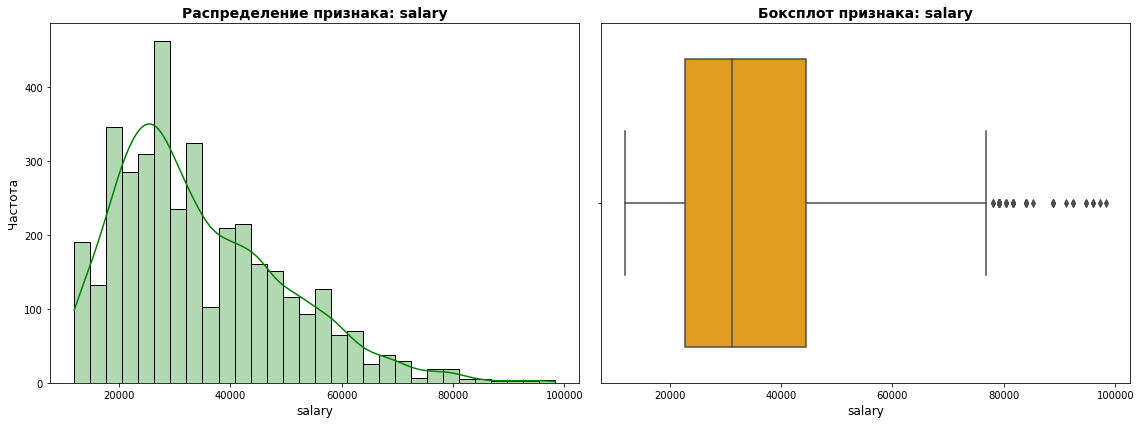

In [143]:
# Распределения для количественных признаков train_data_2
for feature in quantitative_features:
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(train_data[feature], color='green',  alpha=0.3, bins=30, kde=True)
    plt.title(f'Распределение признака: {feature}', fontsize=14, weight='bold')
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Частота', fontsize=12)
        
    plt.subplot(1, 2, 2)
    sns.boxplot(x=train_data[feature], color='orange')
    plt.title(f'Боксплот признака: {feature}', fontsize=14, weight='bold')
    plt.xlabel(feature, fontsize=12)
    
    plt.tight_layout()
    plt.show()

In [144]:
print(train_data_2[train_data_2['salary'] > 74000].to_string())

              dept   level workload  employment_years last_year_promo last_year_violations  supervisor_evaluation  salary quit
id                                                                                                                            
113657  technology  senior     high                 5             yes                   no                      3   82800   no
540780       sales  senior     high                 7              no                  yes                      3   78000   no
208223  technology  senior     high                 7              no                   no                      3   94800   no
694599  technology  senior     high                 1              no                   no                      4   96000   no
646839       sales  senior     high                 5              no                   no                      4   79200   no
169650       sales  senior     high                10              no                   no                     

Видим те же выбросы для сеньоров.

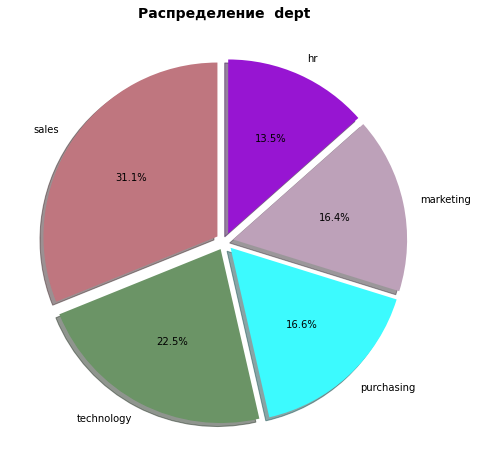

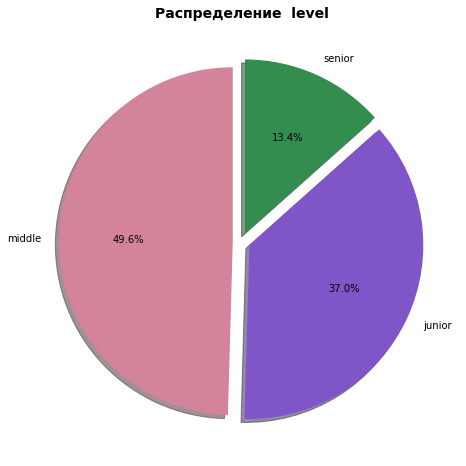

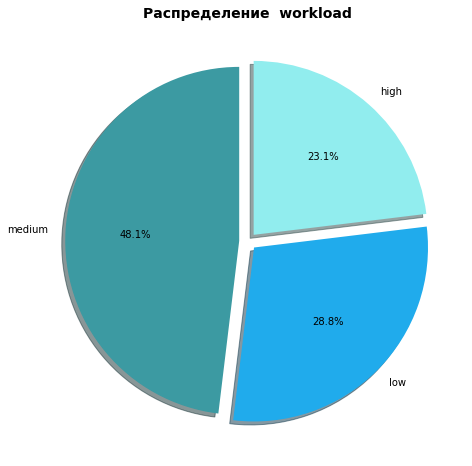

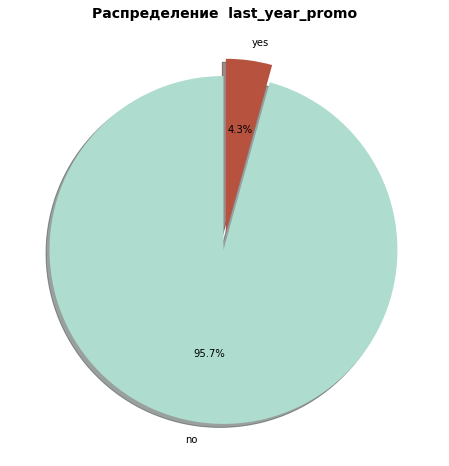

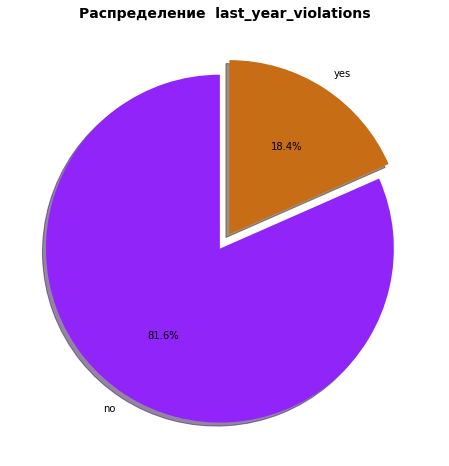

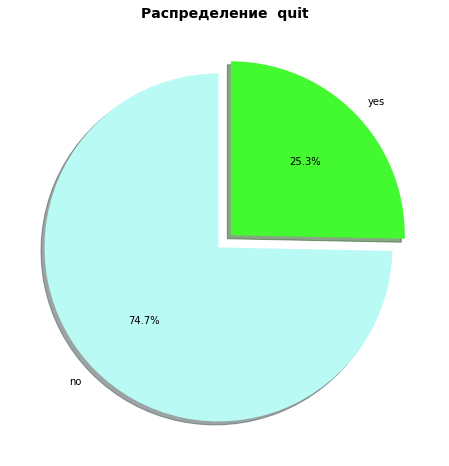

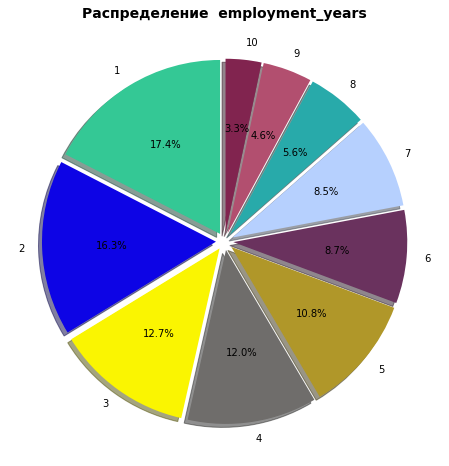

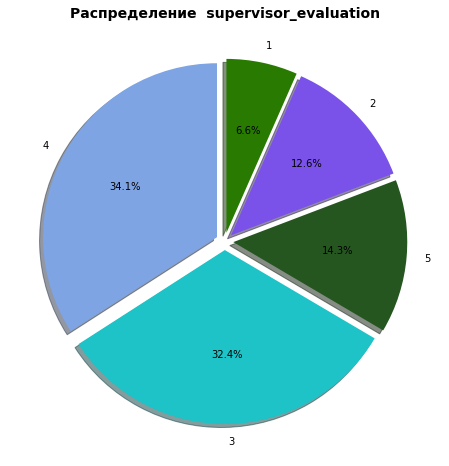

In [145]:
# Распределения категориальных признаков тренировочной выборки
for column in categorical_features:
    
    value_counts = train_data_2[column].value_counts()
    
    colors = ['#' + ''.join(random.choices('0123456789ABCDEF', k=6)) for _ in range(len(value_counts))]
    
    # Круговая диаграмма
    plt.figure(figsize=(8, 8))
    value_counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, explode=[0.05] * len(value_counts), startangle=90, shadow=True)
    plt.title(f'Распределение  {column}', fontsize=14, weight='bold')
    plt.ylabel('')  
    plt.show()

### Взгляд на категориальные признаки train_data_2

- Отделы (dept): Наибольшее количество сотрудников работает в отделах продаж (sales) и технологий (technology). В то же время маркетинг, HR и закупки (purchasing) представлены меньшим числом сотрудников.


- Уровень сотрудников (level): Большая часть сотрудников занимает позиции junior (48.7%) и middle (42.4%), а senior-специалисты составляют лишь 8.9%. Это говорит о пирамидальной структуре компании, где большинство сотрудников находятся на младших и средних уровнях.

- Загруженность (workload): Более половины сотрудников (53%) работают с средним уровнем нагрузки, около 30.2% имеют низкую загруженность, а 16.9% сталкиваются с высокой нагрузкой.

- Повышения за последний год (last_year_promo): Только 2.8% сотрудников получили повышение за последний год, что говорит о низких возможностях карьерного роста внутри компании.

- Нарушения за прошлый год (last_year_violations): 13.6% сотрудников допустили нарушения в течение года, что является достаточно высокой долей и может требовать внимания при оценке качества работы.

- Увольнения (quit): Примерно 28% сотрудников покинули компанию, в то время как 72% остались. Данные содержат дисбаланс классов, так как остающихся сотрудников почти в 2.5 раза больше, что следует учитывать при обучении модели.

- Стаж работы (employment_years): В среднем сотрудники работают в компании около 3.7 лет, а большинство из них имеют 1–3 года стажа. Количество сотрудников с опытом более 10 лет минимально, что указывает на относительно небольшую текучесть кадров.

- Оценка руководителя (supervisor_evaluation): Значения варьируются от 1 до 5, при этом средняя оценка — 3.7. Большинство сотрудников получают оценки 3 или 4, что говорит о стабильном и удовлетворительном качестве работы.



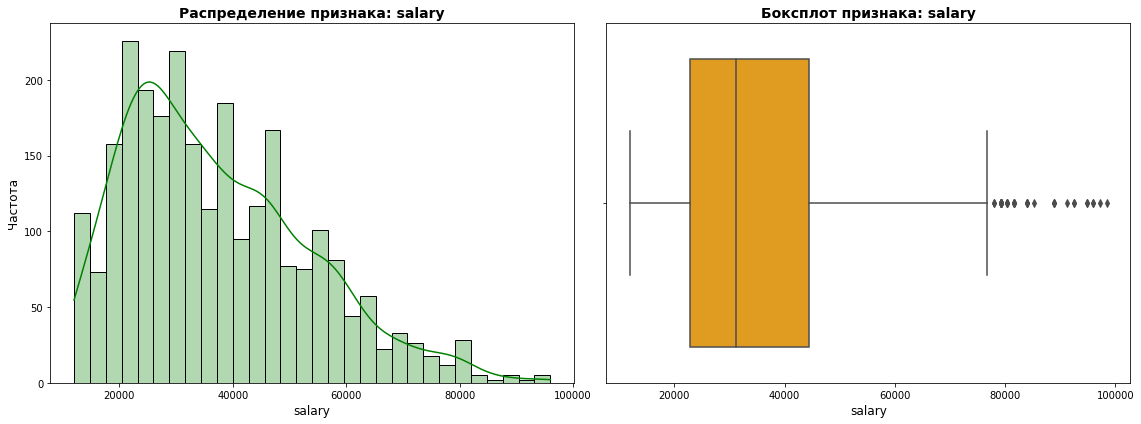

In [146]:
# Распределения для количественных признаков test_data_2
for feature in quantitative_features:
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(train_data_2[feature], color='green',  alpha=0.3, bins=30, kde=True)
    plt.title(f'Распределение признака: {feature}', fontsize=14, weight='bold')
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Частота', fontsize=12)
        
    plt.subplot(1, 2, 2)
    sns.boxplot(x=train_data[feature], color='orange')
    plt.title(f'Боксплот признака: {feature}', fontsize=14, weight='bold')
    plt.xlabel(feature, fontsize=12)
    
    plt.tight_layout()
    plt.show()

Распределения количественных признаков практически идентичны для тренировочной и тестовой выборок.

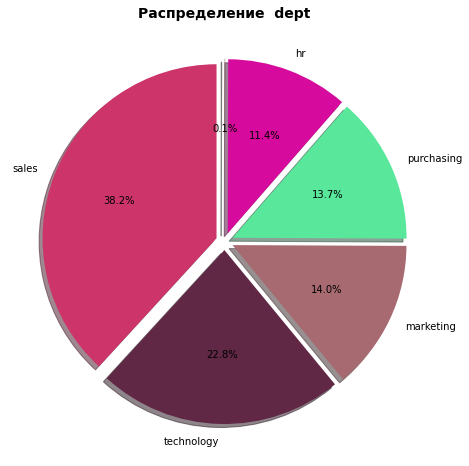

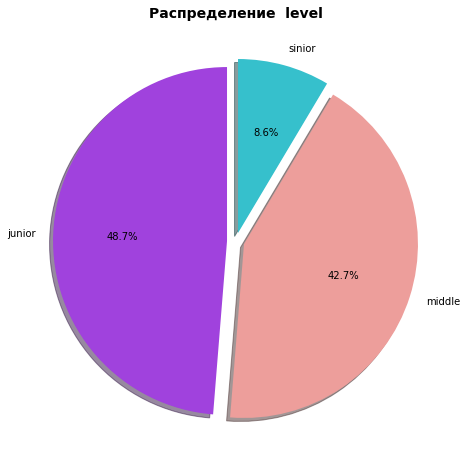

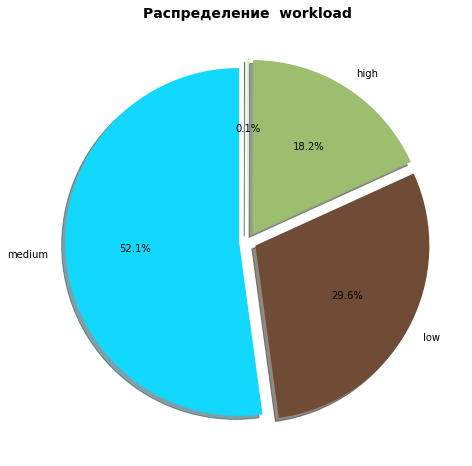

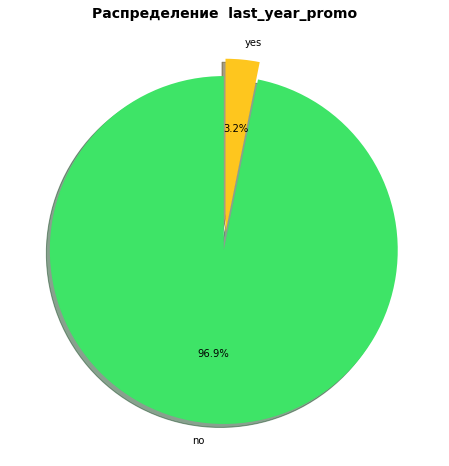

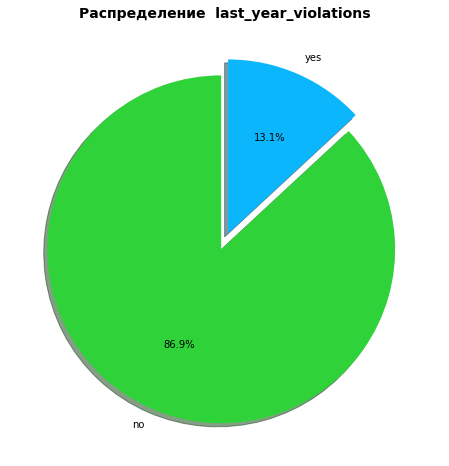

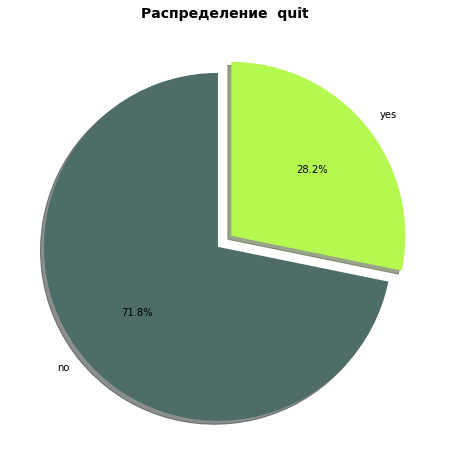

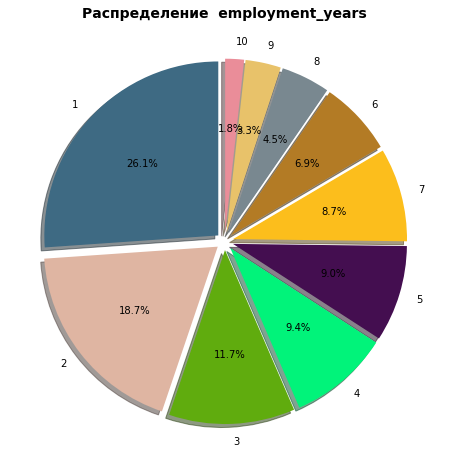

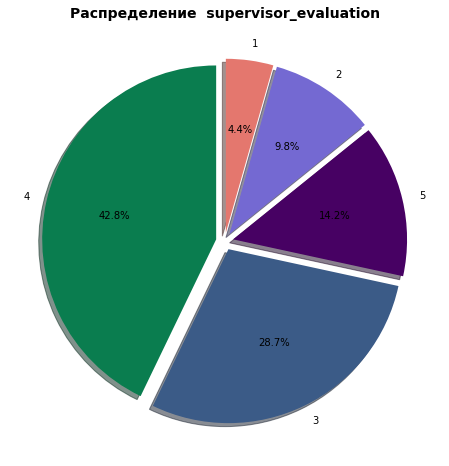

In [147]:
# Взгляд на распределения категориальных признаков тестовой выборки

for column in categorical_features:
    
    value_counts = test_data_2[column].value_counts()
    
    colors = ['#' + ''.join(random.choices('0123456789ABCDEF', k=6)) for _ in range(len(value_counts))]
    
    # Круговая диаграмма
    plt.figure(figsize=(8, 8))
    value_counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, explode=[0.05] * len(value_counts), startangle=90, shadow=True)
    plt.title(f'Распределение  {column}', fontsize=14, weight='bold')
    plt.ylabel('')  # Убираем подпись оси Y
    plt.show()

Распределения категориальных признаков так же очень похожи для тренировочной и тестовой выборок.

##  Корреляционный анализ

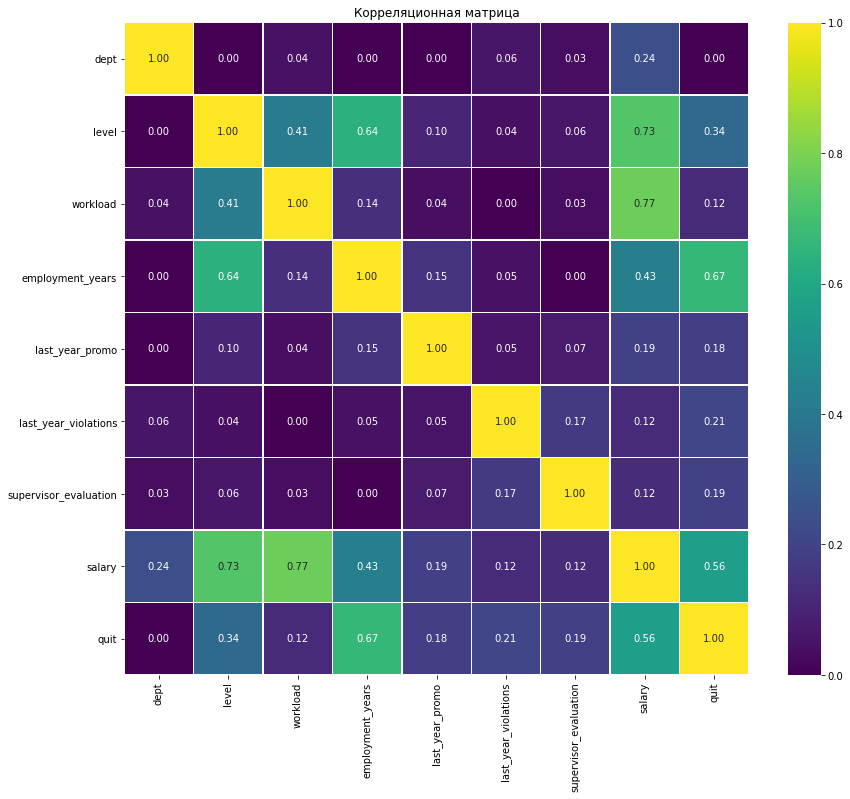

In [150]:
# Построение корелляцияонной матрицы train_data_2
correlation_matrix = train_data_2.phik_matrix(interval_cols=['salary', 'job_satisfaction_rate'])

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", cbar=True, linewidths=0.5)

plt.title('Корреляционная матрица')
plt.show()


Сильная корреляция (> 0.7)
- salary и workload (0.79) - чем выше нагрузка, тем выше зарплата.
- salary и level (0.71) - чем выше уровень сотрудника, тем выше его зарплата.

Умеренная корреляция (0.4 - 0.7)
- employment_years и level (0.64) - чем больше стаж, тем выше уровень сотрудника.
- employment_years и salary (0.43) - сотрудники с большим стажем получают выше зарплату.
- quit и employment_years (0.67) - сотрудники с более длительным стажем чаще увольняются. Возможно, из-за выгорания или отсутствия карьерного роста.
- quit и salary (0.56) - чем выше зарплата, тем выше вероятность увольнения. Это может говорить о том, что высокооплачиваемые специалисты чаще находят лучшие предложения на рынке.

Слабая корреляция (< 0.4)
- quit и level (0.34) - уровень сотрудника слабо влияет на вероятность увольнения.
- quit и workload (0.12) - рабочая нагрузка почти не связана с увольнением.
- quit и last_year_promo (0.18) - недавнее повышение немного снижает вероятность увольнения, но эффект слабый.
- quit и last_year_violations (0.21) - сотрудники с нарушениями чуть чаще увольняются, но влияние слабое.
- quit и supervisor_evaluation (0.19) - оценка руководителя также имеет слабую связь с увольнением.

Практически отсутствующая корреляция (~0)
- dept с quit (0.00) - отдел, в котором работает сотрудник, никак не влияет на увольнение.


Чем дольше работает сотрудник, тем выше вероятность увольнения, возможно, из-за отсутствия карьерного роста.
Высокооплачиваемые сотрудники чаще увольняются, что может быть связано с лучшими предложениями от конкурентов.
Недавнее повышение немного снижает вероятность увольнения, но эффект слабый.
Нарушения за прошлый год не сильно влияют на увольнение, хотя есть небольшая связь.
Отдел работы не влияет на увольнения, что говорит о равномерном распределении текучести кадров.

In [ ]:
# Построение корелляцияонной матрицы test_data_2
correlation_matrix = test_data_2.phik_matrix(interval_cols=['salary', 'job_satisfaction_rate'])

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", cbar=True, linewidths=0.5)

plt.title('Корреляционная матрица')
plt.show()

Корреляции для обоих выборок очень похожи

### Составление портрета уволившегося сотрудника

In [ ]:
# Уровень должности
quit_level = train_data_2.groupby('level')['quit'].value_counts(normalize=True).unstack()['yes'].sort_values(ascending=False)

plt.figure(figsize=(8, 8))
quit_level.plot(
    kind='pie', autopct='%1.1f%%', startangle=90, shadow=True, 
    colors=plt.cm.Paired.colors, explode=[0.05] * len(quit_level)
)

plt.title('Доля уволившихся сотрудников по уровню должности', fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.show()





Больше увольнений среди сотрудников уровня Junior, Senior'ы увольняются немного реже "мидлов".

In [ ]:
# Загруженность
quit_workload = train_data_2.groupby('workload')['quit'].value_counts(normalize=True).unstack()['yes'].sort_values(ascending=False)

plt.figure(figsize=(8, 8))
quit_workload.plot(
    kind='pie', autopct='%1.1f%%', startangle=90, shadow=True, 
    colors=plt.cm.Paired.colors, explode=[0.05] * len(quit_workload)
)

plt.title('Доля уволившихся сотрудников по уровню загруженности', fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.show()

 Чаще всего увольняются сотрудники с низким уровнем загруженности   — доля увольнений среди них составляет 39%.

 Среди тех, кто имеет среднюю загруженность, этот показатель снижается до 20.5%, а среди сотрудников с высокой загруженностью — до 18.3%.

Такая динамика позволяет предположить, что низкая загруженность может вызывать у сотрудников чувство неудовлетворённости, в то время как высокая загруженность, напротив, способствует их удержанию, повышая уровень вовлечённости в рабочий процесс.

In [ ]:
# Повышение
quit_promo = train_data_2.groupby('last_year_promo')['quit'].value_counts(normalize=True).unstack()['yes'].sort_values(ascending=False)

plt.figure(figsize=(8, 8))
quit_promo.plot(
    kind='pie', autopct='%1.1f%%', startangle=90, shadow=True, 
    colors=plt.cm.Paired.colors, explode=[0.05] * len(quit_promo)
)

plt.title('Доля уволившихся сотрудников по повышению', fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.show()

26.4% увольнений среди тех, кто не получил повышение, и 0.9% среди получивших.
Повышение выглядит весомым мотивирующим фактором для длительного сотрудничества.

In [ ]:
# Нарушения
quit_violations = train_data_2.groupby('last_year_violations')['quit'].value_counts(normalize=True).unstack()['yes'].sort_values(ascending=False)

plt.figure(figsize=(8, 8))
quit_violations.plot(
    kind='pie', autopct='%1.1f%%', startangle=90, shadow=True, 
    colors=plt.cm.Paired.colors, explode=[0.05] * len(quit_violations)
)

plt.title('Доля уволившихся сотрудников по нарушениям', fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.show()

Среди нарушителей процент уволившихся больше, чем среди блюстителей дисциплины, 37.8% и 22.5% соответственно. Трактовать этот показатель можно по-разному.

In [ ]:
# Стаж работы
quit_employment_years = train_data_2.groupby('employment_years')['quit'].value_counts(normalize=True).unstack()['yes'].sort_values(ascending=False)

plt.figure(figsize=(8, 8))
quit_employment_years.plot(
    kind='pie', autopct='%1.1f%%', startangle=90, shadow=True, 
    colors=plt.cm.Paired.colors, explode=[0.05] * len(quit_employment_years)
)

plt.title('Доля уволившихся сотрудников по стажу работы', fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.show()

Наибольший процент увольнений отмечается среди сотрудников, проработавших в компании 1 и 2 года. У тех, кто работает в организации более 5 лет, доля увольнений значительно ниже. 

In [ ]:
# Оценка работы руководителем
quit_supervisor_evaluation = train_data_2.groupby('supervisor_evaluation')['quit'].value_counts(normalize=True).unstack()['yes'].sort_values(ascending=False)

plt.figure(figsize=(8, 8))
quit_supervisor_evaluation.plot(
    kind='pie', autopct='%1.1f%%', startangle=90, shadow=True, 
    colors=plt.cm.Paired.colors, explode=[0.05] * len(quit_supervisor_evaluation)
)

plt.title('Доля уволившихся сотрудников по оыенке работы руководителя', fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.show()

Наибольшая доля увольнений среди сотрудников с низкими оценками: 1 - 29%, 2 - 27.2%.
    

In [ ]:
# Доля уволившихся сотрудников по отделам
quit_dept = train_data_2.groupby('dept')['quit'].value_counts(normalize=True).unstack()['yes'].sort_values(ascending=False)

plt.figure(figsize=(8, 8))
quit_dept.plot(
    kind='pie', autopct='%1.1f%%', 
    startangle=90, shadow=True, 
    colors=plt.cm.Paired.colors, 
    explode=[0.05] * len(quit_dept)
)

plt.title('Доля уволившихся сотрудников по отделам', fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.show()

Уровень увольнений по отделам довольно равномерный, в диапазоне от 18,5% до 21,9%. Наибольший процент увольнений зафиксирован в технологическом отделе, затем идут отделы продаж и закупок. В отделах маркетинга и кадров показатели немного ниже. Такие незначительные различия указывают на то, что принадлежность к определённому отделу не является ключевым фактором, влияющим на вероятность увольнения сотрудников.

In [ ]:
# Среднаяя зарплата
quit_avg_salary = train_data_2.groupby('quit')['salary'].mean()


plt.figure(figsize=(8, 8))
sns.barplot(x=quit_avg_salary.index, y=quit_avg_salary.values)
plt.title('Средняя зарплата')
plt.xlabel('Увольнение')
plt.ylabel('Рублей')
plt.show()

quit_avg_salary

Зарплата всегда являлась краеугольным камнем в лояльности сотрудников.

Наиболее типичный портрет сотрудника, который увольняется, включает следующие характеристики: это специалист уровня Junior, проработавший в компании менее двух лет, не получивший повышения по службе, имеющий низкую оценку от руководителя и, возможно, допустивший нарушения трудовой дисциплины в течение последнего года.

### Влияние удовлетворенности работой на факт увольнения

In [ ]:
quit_satisfaction = target_data.merge(target_data_2, on='id', how='left')


sns.kdeplot(data=quit_satisfaction[quit_satisfaction['quit'] == 'yes'], x='job_satisfaction_rate', label='Уволившиеся', shade=True)

sns.kdeplot(data=quit_satisfaction[quit_satisfaction['quit'] == 'no'], x='job_satisfaction_rate', label='Оставшиеся', shade=True)

plt.title('Распределение уровня удовлетворенности для уволившихся и оставшихся')
plt.xlabel('Удовлетворенность')
plt.ylabel('')
plt.legend()
plt.show()

Граница между группами находится на уровне удовлетворенности около 0.5, ниже которого шанс на увольнение увеличивается. Можно говорить, что выявлена зависимость между увдовлетворенностью работой и увольнением.

## Добавление нового входного признака

In [ ]:
# Добавление нового входного признака
train_col = random_search.predict(train_data_2)
train_data_2['job_satisfaction_rate'] = train_col
display(train_data_2.head())

In [ ]:
test_col = random_search.predict(test_data_2)
test_data_2['job_satisfaction_rate'] = test_col
display(test_data_2.head())

## Подготовка данных и обучение моделей

In [ ]:
# Загрузка данных
X_train = train_data_2.drop(['quit'], axis=1)
y_train = train_data_2['quit']
X_test = test_data_2.drop(['quit'], axis=1)
y_test = test_data_2['quit']


# LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

cols_ohe = ['dept']
cols_ordinal = ['level', 'workload', 'last_year_promo', 'last_year_violations']
cols_to_scale = ['salary', 'employment_years', 'supervisor_evaluation', 'job_satisfaction_rate']

# Отбор признаков на основе Feature Importance
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('feature_selector', SelectFromModel(RandomForestClassifier(random_state=RANDOM_STATE))),
    ('models', LogisticRegression(random_state=RANDOM_STATE))
])

# Обучение моделей
param_grid = [
    {
        'models': [RandomForestClassifier(random_state=RANDOM_STATE)],
        'models__n_estimators': [50, 100, 200],
        'models__max_depth': [15, 20, 30],
        'models__min_samples_split': [2, 5],
        'models__min_samples_leaf': [1, 2],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },
    {
        'models': [GradientBoostingClassifier(random_state=RANDOM_STATE)],
        'models__n_estimators': [50, 100, 200, 300, 500],
        'models__learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2],
        'models__max_depth': range(3, 10),
        'models__min_samples_split': [2, 5, 10, 20],
        'models__min_samples_leaf': [1, 2, 4, 8],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE)],
        'models__C': [0.1, 1, 10, 100],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },
    {
        'models': [SVC(random_state=RANDOM_STATE)],
        'models__C': [0.1, 1, 10],  
        'models__kernel': ['linear', 'rbf', 'poly'], 
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    }
]

randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
    
)
randomized_search.fit(X_train, y_train)
print('RandomizedSearchCV - Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print('RandomizedSearchCV - Метрика лучшей модели на кросс-валидации:', randomized_search.best_score_)

In [ ]:
y_test_proba = randomized_search.predict_proba(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_proba[:,1])}')

ROC-AUC ≥ 0.91 на тестовой выборке, в 92 случаях из 100 модель верно предсказывает увольнение сотрудника.

In [ ]:
pd.set_option('display.max_colwidth', None)
results_2 = pd.DataFrame(randomized_search.cv_results_)[['rank_test_score', 'param_models', 'mean_test_score','params']]\
            .sort_values('rank_test_score')
results_2

### Промежуточный вывод

Лучший результат по метрике ROC-AUC на кросс-валидации показала модель GradientBoostingClassifier с гиперпараметрами:

learning_rate: 0.05, max_depth: 4, min_samples_leaf: 8, n_estimators: 300

Метрика на кросс-валидации (ROC-AUC): 0.9224

## Вывод

В рамках проекта была проведена работа по улучшению управления персоналом. Проект состоял из двух ключевых задач:

- Предсказание уровня удовлетворённости сотрудников.
Были построены регрессионные модели, которые позволяют оценить, насколько сотрудники довольны своей работой. Это помогает выявлять группы сотрудников с низким уровнем удовлетворённости и принимать меры для улучшения их рабочего опыта, например, через обучение, пересмотр условий труда или системы поощрений.

- Предсказание вероятности увольнения сотрудников.
Для этой задачи были обучены классификационные модели, которые помогают HR-отделу заранее выявлять сотрудников, склонных к увольнению. Это позволяет компании предпринимать превентивные меры, такие как предложение повышения, изменение обязанностей или улучшение условий работы, чтобы удержать ценные кадры.

Основные этапы работы:
- Анализ данных:
Изучены данные о сотрудниках, включая отдел, должность, стаж, зарплату, оценку руководителя и другие параметры. Проведён анализ распределения признаков, выявлены пропуски и выбросы.

- Предобработка данных:
Пропущенные значения заполнены с использованием наиболее частых значений или специальных кодировок. Категориальные признаки закодированы с помощью One-Hot Encoding и Ordinal Encoding, а числовые признаки масштабированы для снижения влияния выбросов. Весь процесс предобработки был стандартизирован с использованием пайплайна.

- Построение и выбор моделей:
Для предсказания удовлетворённости использовались регрессионные модели, а для предсказания увольнений — классификационные. Лучшие модели были выбраны на основе метрик SMAPE (для удовлетворённости) и ROC-AUC (для увольнений). Наилучший результат показала модель GradientBoostingClassifier.

- Результаты анализа:
Сегментация сотрудников:
Выявлено, что чаще всего увольняются junior-сотрудники из отдела продаж, чья зарплата значительно ниже средней по компании. Также высокий риск увольнения наблюдается среди сотрудников технологического отдела, несмотря на их высокие зарплаты.

Рекомендации для компании:

- Провести анализ системы оценки и поощрений для сотрудников отдела продаж.

- Разработать программу адаптации для junior-сотрудников, чтобы помочь им интегрироваться в компанию.

- Внедрить программы, направленные на укрепление командного духа и разрешение конфликтных ситуаций.

- Разгрузить senior-сотрудников и наладить коммуникацию между ними и менее опытными коллегами, внедрив институт наставничества.

- Повышать лояльность сотрудников через корпоративные мероприятия и проекты.

Итог:
- Проект позволил компании "Работа с заботой" получить инструменты для прогнозирования удовлетворённости и увольнений сотрудников, что помогает минимизировать риски потери кадров и улучшить управление персоналом. Реализация предложенных рекомендаций может значительно повысить уровень удовлетворённости сотрудников и снизить текучесть кадров.